In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style='darkgrid', font_scale=1.5, color_codes=True)
print(os.listdir("../input"))


Bad key "text.kerning_factor" on line 4 in
C:\Users\WonjunChun\Anaconda3\envs\venv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


['Mall_Customers.csv']


In [2]:
#importing the dataset
dataset = pd.read_csv('../input/Mall_Customers.csv', index_col='CustomerID')

In [3]:
dataset.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
dataset.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
dataset.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [7]:
dataset.drop_duplicates(inplace=True)

In [8]:
#using only Spending_Score and income variance for easy visualisation
X = dataset.iloc[:, [2, 3]].values

In [23]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=9)
clusters = dbscan.fit_predict(X)
print("cluster label: {}".format(clusters))


cluster label: [ 2  0  1  0  2  0  1 -1  1  0  1 -1  1  0  1  0  2  0  2 -1  2  0  1  0
  1  0  2  0  2  0  1  0  1 -1  1  0  1  0 -1  0  3 -1  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  4  3  4  3  4  5  4  5  4  3  4  5  4  5  4  5  4  5  4  3  4
  5  4  3  4  5  4  5  4  5  4  5  4  5  4  5  4  3  4  5  4  5  4  5  4
  5 -1  5  4  5  4  5  4  5  4  5  4 -1  4  5  4 -1 -1 -1 -1 -1  4 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


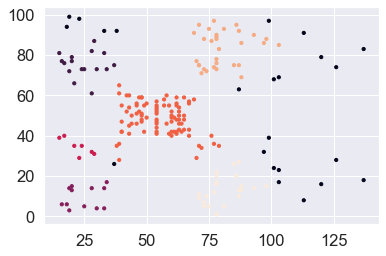

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, marker='o', s=10)